# 데이터 정제

In [1]:
# screen = pd.read_csv('C:/Users/chhch/OneDrive/Documents/POSTECH/빅데이터프로젝트/A반_3조_보험_Data Set/screenh_h_screen.csv', engine = 'python', encoding = 'cp949')
# screen
# #결측치 (id별)
# i = 0
# column = list(screen.columns)
# for n in range(len(screen)):
#     for x in column:
#         if screen[x][n] == '.':
#             i +=1
#             print(n)
#             break
# i  
# column = list(screen.columns)
# for n in range(len(screen)):
#     for x in column:
#         if screen[x][n] == '.':
#             screen[x][n] = None
# screen.dropna(inplace=True)
# screen

# #열별 결측치
# error = []
# column = list(screen.columns)

# for x in column:
#     j = 0
#     for n in range(len(screen)):
#         if screen[x][n] == '.':
#             j +=1
#     error.append(j)

# error

In [1]:
import pandas as pd

#행렬 연산 패키지
import numpy as np

#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
# 이상치 개수 세는 함수
def countOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    iqr = 1.5 * (q3 - q1)
 
    lenOutliers = len(x[column][(x[column] > (q3 + iqr)) | (x[column] < (q1 - iqr))])
    
    return lenOutliers

# 이상치 NaN으로 만드는 함수
def NaNOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    iqr = 1.5 * (q3 - q1)
 
    x[column][(x[column] > (q3 + iqr)) | (x[column] < (q1 - iqr))] = None
    
    return x[column]

In [ ]:
# def fun_plot_hist(data, var):
#     plt.hist(data[data["SCALE"] == "양품"][var], label="양품", alpha=0.5)
#     plt.hist(data[data["SCALE"] == "불량"][var], label="불량", alpha=0.5)
#     plt.legend()

# def fun_plot_hist_kde(data, var):
#     grp_col_dict = {'양품': 'blue', '불량': 'red'}
 
#     for group in grp_col_dict:
#         subset = data[data['SCALE'] == group]
#         sns.distplot(subset[var], 
#                         hist = True, # histogram
#                         kde = True,  # density curve
#                         color = grp_col_dict[group],
#                         label = group)
        
#     plt.title('Histogram & Density Plot by Groups')
#     plt.xlabel(str(var))
#     plt.ylabel('Density')
#     plt.legend(prop={'size': 12}, title = 'Group')
#     plt.show()

In [7]:
screen = pd.read_excel('insu_nh_h_screen_processing.xlsx')
screen.head()

,no,gender,age_group,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
0,1,2,55~59,155,55,67.5,0.9,1.0,1,1,...,97,52,88,13.4,0.6,21,24,30,1,1
1,2,1,35~39,170,70,84.8,1.2,1.0,1,1,...,139,46,136,17.1,0.9,25,30,33,2,1
2,3,1,35~39,170,70,86.0,1.0,1.0,1,1,...,82,50,123,14.7,0.7,43,46,88,1,1
3,4,2,40~44,155,50,77.0,1.5,1.5,1,1,...,55,47,117,13.4,0.6,17,8,10,1,0
4,5,2,40~44,165,55,66.0,1.0,1.0,1,1,...,65,64,104,10.3,0.7,39,43,18,1,1


In [5]:
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,...,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000
mean,88664.024900,1.506475,162.194395,62.875228,80.991468,0.956091,0.954433,1.030453,1.029745,122.022970,...,126.253603,58.430371,112.082415,14.172456,0.854677,25.516602,24.883005,35.225595,1.561834,0.518226
std,51195.155885,0.499959,9.278843,12.853848,14.357265,0.590179,0.604527,0.171831,0.169885,14.830015,...,98.984918,15.378098,34.565917,1.538076,0.563286,25.442332,23.682425,47.603805,0.793226,0.499669
min,1.000000,1.000000,85.000000,25.000000,47.500000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,5.000000,1.000000,3.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,44320.250000,1.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,111.000000,...,71.000000,47.000000,88.000000,13.100000,0.700000,19.000000,14.000000,15.000000,1.000000,0.000000
50%,88662.500000,2.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,102.000000,57.000000,110.000000,14.100000,0.800000,22.000000,19.000000,22.000000,1.000000,1.000000
75%,133004.750000,2.000000,170.000000,70.000000,87.600000,1.200000,1.200000,1.000000,1.000000,131.000000,...,151.000000,68.000000,133.000000,15.300000,1.000000,28.000000,28.000000,37.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,180.000000,999.000000,9.900000,9.900000,2.000000,2.000000,250.000000,...,4930.000000,571.000000,1728.000000,21.400000,96.000000,5186.000000,2427.000000,999.000000,3.000000,1.000000


In [6]:
screen.describe().iloc[:,8:20]

,hearing_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt
count,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000,176666.000000
mean,1.029745,122.022970,75.669291,99.648727,195.079455,126.253603,58.430371,112.082415,14.172456,0.854677,25.516602,24.883005
std,0.169885,14.830015,10.229371,23.044865,37.727771,98.984918,15.378098,34.565917,1.538076,0.563286,25.442332,23.682425
min,1.000000,71.000000,34.000000,24.000000,43.000000,4.000000,5.000000,1.000000,3.000000,0.100000,1.000000,1.000000
25%,1.000000,111.000000,69.000000,88.000000,169.000000,71.000000,47.000000,88.000000,13.100000,0.700000,19.000000,14.000000
50%,1.000000,120.000000,75.000000,95.000000,193.000000,102.000000,57.000000,110.000000,14.100000,0.800000,22.000000,19.000000
75%,1.000000,131.000000,82.000000,104.000000,218.000000,151.000000,68.000000,133.000000,15.300000,1.000000,28.000000,28.000000
max,2.000000,250.000000,160.000000,712.000000,1803.000000,4930.000000,571.000000,1728.000000,21.400000,96.000000,5186.000000,2427.000000


## waist, eyesight_left,	eyesight_right, bp_max,  bp_min,	bp_gluc,	bt_chol,  bt_trig,	bt_hdl,	bt_ldl,bt_crea	bt_ast	bt_alt	bt_rgpt   이상치 확인 

### waist 이상치 처리

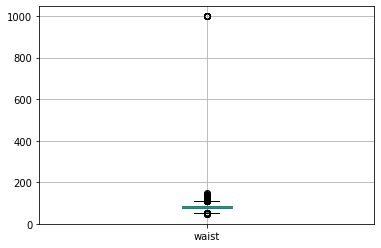

In [7]:
pd.DataFrame(screen['waist']).boxplot()

In [8]:
screen = screen[screen['waist']<200]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,...,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000,176644.000000
mean,88663.963984,1.506414,162.194697,62.875869,80.877135,0.956074,0.954414,1.030457,1.029749,122.025045,...,126.243450,58.427306,112.080376,14.172758,0.854712,25.517487,24.884417,35.228641,1.561893,0.518285
std,51196.167087,0.499960,9.279191,12.854148,10.059059,0.590204,0.604549,0.171841,0.169895,14.829261,...,98.980262,15.375264,34.562735,1.537890,0.563309,25.443700,23.683377,47.605969,0.793252,0.499667
min,1.000000,1.000000,85.000000,25.000000,47.500000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,5.000000,1.000000,3.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,44320.750000,1.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,111.000000,...,71.000000,47.000000,88.000000,13.100000,0.700000,19.000000,14.000000,15.000000,1.000000,0.000000
50%,88660.500000,2.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,102.000000,57.000000,110.000000,14.100000,0.800000,22.000000,19.000000,22.000000,1.000000,1.000000
75%,133008.250000,2.000000,170.000000,70.000000,87.600000,1.200000,1.200000,1.000000,1.000000,131.000000,...,151.000000,68.000000,133.000000,15.300000,1.000000,28.000000,28.000000,37.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,180.000000,150.000000,9.900000,9.900000,2.000000,2.000000,250.000000,...,4930.000000,571.000000,1728.000000,21.400000,96.000000,5186.000000,2427.000000,999.000000,3.000000,1.000000


In [9]:
countOutliers(screen, 'waist')
1352/176666 *100


0.7652859067392708

In [10]:
NaNOutliers(screen, 'waist')
screen.isnull().sum()

C:\Users\chhch\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\chhch\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


no                   0
gender               0
age_group            0
height_group         0
weight_group         0
waist             1352
eyesight_left        0
eyesight_right       0
hearing_left         0
hearing_right        0
bp_max               0
bp_min               0
bp_gluc              0
bt_chol              0
bt_trig              0
bt_hdl               0
bt_ldl               0
bt_mch               0
bt_crea              0
bt_ast               0
bt_alt               0
bt_rgpt              0
smoke_flag           0
drinking_flag        0
dtype: int64

In [11]:
screen.dropna(inplace = True)
screen

C:\Users\chhch\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,no,gender,age_group,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
0,1,2,55~59,155,55,67.5,0.9,1.0,1,1,...,97,52,88,13.4,0.6,21,24,30,1,1
1,2,1,35~39,170,70,84.8,1.2,1.0,1,1,...,139,46,136,17.1,0.9,25,30,33,2,1
2,3,1,35~39,170,70,86.0,1.0,1.0,1,1,...,82,50,123,14.7,0.7,43,46,88,1,1
3,4,2,40~44,155,50,77.0,1.5,1.5,1,1,...,55,47,117,13.4,0.6,17,8,10,1,0
4,5,2,40~44,165,55,66.0,1.0,1.0,1,1,...,65,64,104,10.3,0.7,39,43,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176661,177342,1,30~34,170,75,82.0,1.2,1.5,1,1,...,76,50,142,15.4,0.8,23,27,51,3,1
176662,177343,2,60~64,155,70,86.0,1.2,1.0,1,1,...,104,59,178,13.5,0.7,26,34,28,1,0
176663,177344,1,50~54,175,65,86.0,0.5,0.5,1,1,...,220,54,119,16.9,0.6,17,21,140,3,1
176664,177345,2,20~24,165,65,73.0,1.5,1.2,1,1,...,41,56,78,12.6,0.7,15,13,16,3,0


### eyesight_left	eyesight_right

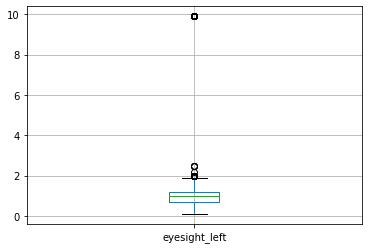

In [12]:
pd.DataFrame(screen['eyesight_left']).boxplot()

In [13]:
screen = screen[screen['eyesight_left']<4]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,...,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000,174783.000000
mean,88669.307101,1.508488,162.155845,62.597106,80.637013,0.929840,0.949990,1.030232,1.029517,121.914122,...,125.778817,58.513030,112.087983,14.166071,0.854068,25.430465,24.683831,35.009337,1.559385,0.518351
std,51195.746585,0.499929,9.250806,12.382816,9.685055,0.340016,0.568923,0.171225,0.169250,14.775517,...,98.594985,15.376288,34.543091,1.535349,0.564790,25.483882,23.413790,47.356201,0.792126,0.499665
min,1.000000,1.000000,85.000000,25.000000,53.800000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,5.000000,1.000000,3.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,44328.500000,1.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,111.000000,...,70.000000,47.000000,88.000000,13.100000,0.700000,19.000000,14.000000,15.000000,1.000000,0.000000
50%,88668.000000,2.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,101.000000,57.000000,110.000000,14.100000,0.800000,22.000000,19.000000,22.000000,1.000000,1.000000
75%,133008.500000,2.000000,170.000000,70.000000,87.000000,1.200000,1.200000,1.000000,1.000000,131.000000,...,151.000000,68.000000,133.000000,15.300000,1.000000,28.000000,28.000000,37.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,130.000000,107.900000,2.500000,9.900000,2.000000,2.000000,250.000000,...,4930.000000,571.000000,1728.000000,21.400000,96.000000,5186.000000,2427.000000,999.000000,3.000000,1.000000


In [14]:
countOutliers(screen, 'eyesight_left')
NaNOutliers(screen, 'waist')
screen.dropna(inplace = True)

C:\Users\chhch\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\chhch\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\chhch\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

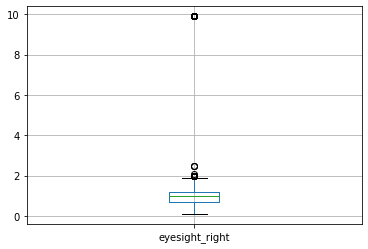

In [15]:
pd.DataFrame(screen['eyesight_right']).boxplot()

In [16]:
screen = screen[screen['eyesight_right']<4]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,...,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000,174023.000000
mean,88673.846566,1.509071,162.152963,62.554174,80.591468,0.930313,0.926568,1.030140,1.029387,121.880619,...,125.656810,58.536688,112.107652,14.165011,0.853862,25.410055,24.646386,34.960086,1.558880,0.518650
std,51200.929081,0.499919,9.246125,12.321797,9.631276,0.339865,0.338332,0.170972,0.168889,14.762461,...,98.559399,15.375052,34.533986,1.535199,0.565311,25.508260,23.379214,47.346598,0.791981,0.499653
min,1.000000,1.000000,85.000000,25.000000,54.800000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,5.000000,1.000000,3.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,44334.500000,1.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,111.000000,...,70.000000,47.000000,88.000000,13.100000,0.700000,19.000000,14.000000,15.000000,1.000000,0.000000
50%,88667.000000,2.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,101.000000,57.000000,110.000000,14.100000,0.800000,22.000000,19.000000,22.000000,1.000000,1.000000
75%,133021.500000,2.000000,170.000000,70.000000,87.000000,1.200000,1.200000,1.000000,1.000000,131.000000,...,150.000000,68.000000,133.000000,15.300000,1.000000,28.000000,28.000000,37.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,130.000000,106.500000,2.500000,2.500000,2.000000,2.000000,250.000000,...,4930.000000,571.000000,1728.000000,21.400000,96.000000,5186.000000,2427.000000,999.000000,3.000000,1.000000


In [17]:
countOutliers(screen, 'eyesight_right')

985

In [18]:
NaNOutliers(screen, 'eyesight_right')
screen.dropna(inplace = True)

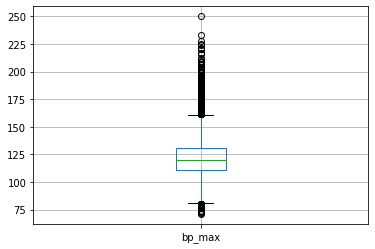

In [19]:
pd.DataFrame(screen['bp_max']).boxplot()

In [20]:
countOutliers(screen, 'bp_max')

1714

In [21]:
NaNOutliers(screen, 'bp_max')
screen.dropna(inplace = True)

C:\Users\chhch\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


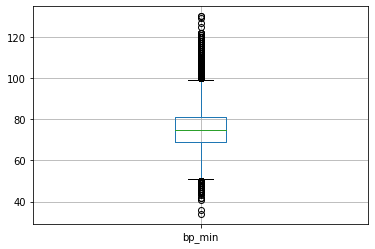

In [22]:
pd.DataFrame(screen['bp_min']).boxplot()

In [23]:
countOutliers(screen, 'bp_min')

2652

In [24]:
NaNOutliers(screen, 'bp_min')
screen.dropna(inplace = True)

C:\Users\chhch\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


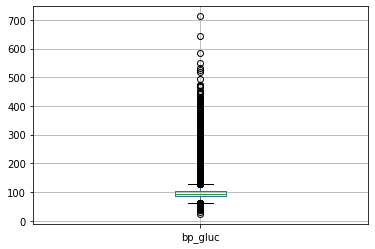

In [25]:
pd.DataFrame(screen['bp_gluc']).boxplot()

In [26]:
countOutliers(screen, 'bp_gluc')
11382/170099

0.06691397362712302

In [27]:
NaNOutliers(screen, 'bp_gluc')
screen.dropna(inplace = True)

C:\Users\chhch\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


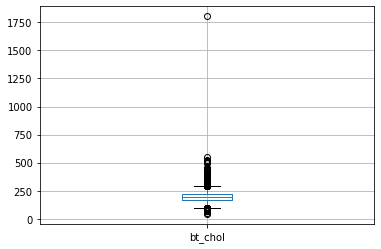

In [28]:
pd.DataFrame(screen['bt_chol']).boxplot()

In [29]:
screen = screen[screen['bt_chol']<1750]
screen.describe().iloc[:,8:15]

,hearing_right,bp_max,bp_min,bp_gluc,bt_chol,bt_trig,bt_hdl
count,158157.000000,158157.000000,158157.000000,158157.000000,158157.000000,158157.000000,158157.000000
mean,1.027637,120.620428,74.821766,95.208521,195.421467,121.094678,59.021523
std,0.163931,13.545368,9.290863,11.216264,36.765405,91.039697,15.388533
min,1.000000,81.000000,51.000000,64.000000,43.000000,4.000000,5.000000
25%,1.000000,110.000000,68.000000,88.000000,170.000000,69.000000,48.000000
50%,1.000000,120.000000,75.000000,94.000000,193.000000,98.000000,57.000000
75%,1.000000,130.000000,81.000000,102.000000,218.000000,145.000000,68.000000
max,2.000000,161.000000,99.000000,128.000000,555.000000,4930.000000,571.000000


In [30]:
countOutliers(screen, 'bt_chol')
2167/159447 * 100

1.359072293614806

In [31]:
NaNOutliers(screen, 'waist')
screen.dropna(inplace = True)

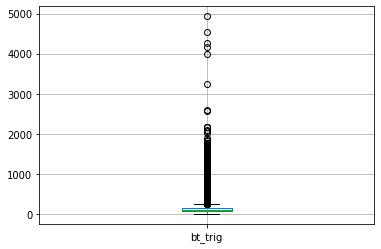

In [32]:
pd.DataFrame(screen['bt_trig']).boxplot()

In [33]:
screen = screen[screen['bt_trig']<2000]

In [34]:
countOutliers(screen, 'bt_trig')
9773/159946

0.06110187188176009

In [35]:
NaNOutliers(screen, 'bt_trig')
screen.dropna(inplace = True)

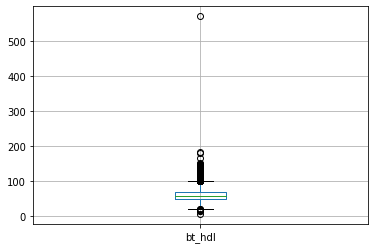

In [36]:
pd.DataFrame(screen['bt_hdl']).boxplot()

In [37]:
screen = screen[screen['bt_hdl']<200]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,...,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000,149349.000000
mean,88674.111979,1.541745,161.878988,61.576743,79.670310,0.932135,0.925789,1.028731,1.027814,120.271411,...,106.109863,59.834816,112.926079,14.066310,0.843033,24.615203,23.133513,30.633021,1.511841,0.507516
std,51218.159976,0.498256,9.203245,11.980864,9.487297,0.335534,0.329752,0.167051,0.164440,13.545248,...,50.394982,15.140242,33.469290,1.514693,0.531464,22.775768,21.626537,38.285441,0.770165,0.499945
min,1.000000,1.000000,85.000000,25.000000,54.800000,0.100000,0.100000,1.000000,1.000000,81.000000,...,4.000000,5.000000,1.000000,4.300000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,44306.000000,1.000000,155.000000,50.000000,73.000000,0.700000,0.700000,1.000000,1.000000,110.000000,...,67.000000,49.000000,90.000000,13.100000,0.700000,18.000000,14.000000,15.000000,1.000000,0.000000
50%,88684.000000,2.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,95.000000,58.000000,111.000000,14.000000,0.800000,22.000000,19.000000,21.000000,1.000000,1.000000
75%,133091.000000,2.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,135.000000,69.000000,134.000000,15.200000,1.000000,27.000000,26.000000,33.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,130.000000,106.500000,2.500000,1.900000,2.000000,2.000000,161.000000,...,259.000000,183.000000,1616.000000,21.400000,96.000000,5186.000000,2427.000000,999.000000,3.000000,1.000000


In [38]:
countOutliers(screen, 'bt_hdl')

2157

In [39]:
NaNOutliers(screen, 'bt_hdl')
screen.dropna(inplace = True)

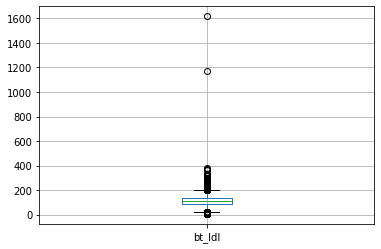

In [40]:
pd.DataFrame(screen['bt_ldl']).boxplot()

In [41]:
screen = screen[screen['bt_ldl']<800]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,147190.000000,147190.000000,147190.000000,147190.000000,147190.000000,147190.00000,147190.00000,147190.000000,147190.000000,147190.000000,...,147190.000000,147190.000000,147190.000000,147190.000000,147190.000000,147190.000000,147190.000000,147190.000000,147190.000000,147190.000000
mean,88659.601325,1.537883,161.916876,61.696854,79.778802,0.93214,0.92581,1.028949,1.027984,120.314858,...,106.607473,59.115877,113.191888,14.074184,0.844046,24.556492,23.170494,30.590767,1.514233,0.505204
std,51214.377868,0.498565,9.219184,11.980629,9.463208,0.33549,0.32966,0.167664,0.164928,13.538190,...,50.441260,13.967368,33.044561,1.516492,0.534546,18.043736,21.011425,37.715337,0.771108,0.499975
min,1.000000,1.000000,85.000000,25.000000,54.800000,0.10000,0.10000,1.000000,1.000000,81.000000,...,4.000000,19.000000,6.000000,4.300000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,44288.250000,1.000000,155.000000,55.000000,73.000000,0.70000,0.70000,1.000000,1.000000,110.000000,...,68.000000,49.000000,90.000000,13.100000,0.700000,18.000000,14.000000,15.000000,1.000000,0.000000
50%,88683.500000,2.000000,160.000000,60.000000,80.000000,1.00000,1.00000,1.000000,1.000000,120.000000,...,95.000000,58.000000,111.000000,14.000000,0.800000,22.000000,19.000000,21.000000,1.000000,1.000000
75%,133058.000000,2.000000,170.000000,70.000000,86.000000,1.20000,1.20000,1.000000,1.000000,130.000000,...,135.000000,68.000000,134.000000,15.200000,1.000000,27.000000,26.000000,33.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,130.000000,106.500000,2.50000,1.90000,2.000000,2.000000,161.000000,...,259.000000,99.000000,380.000000,21.400000,96.000000,3086.000000,2427.000000,999.000000,3.000000,1.000000


In [42]:
countOutliers(screen, 'bt_ldl')

1510

In [43]:
NaNOutliers(screen, 'bt_ldl')
screen.dropna(inplace = True)

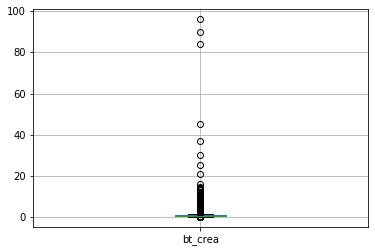

In [44]:
pd.DataFrame(screen['bt_crea']).boxplot()

In [45]:
screen = screen[screen['bt_crea']<40]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,...,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000,145676.000000
mean,88667.231425,1.537487,161.935734,61.684457,79.754832,0.932281,0.925943,1.028962,1.027939,120.287837,...,106.360176,59.125951,112.201502,14.070669,0.841660,24.515885,23.106126,30.473599,1.513962,0.506240
std,51209.529151,0.498594,9.216386,11.978997,9.466683,0.335485,0.329727,0.167699,0.164798,13.535568,...,50.385104,13.977701,31.362685,1.517056,0.331582,18.047665,20.998411,37.410518,0.770891,0.499963
min,1.000000,1.000000,85.000000,25.000000,54.800000,0.100000,0.100000,1.000000,1.000000,81.000000,...,4.000000,19.000000,24.000000,4.300000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,44294.500000,1.000000,155.000000,55.000000,73.000000,0.700000,0.700000,1.000000,1.000000,110.000000,...,68.000000,49.000000,90.000000,13.100000,0.700000,18.000000,14.000000,14.000000,1.000000,0.000000
50%,88688.500000,2.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,95.000000,58.000000,111.000000,14.000000,0.800000,22.000000,19.000000,21.000000,1.000000,1.000000
75%,133052.250000,2.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,135.000000,68.000000,133.000000,15.200000,1.000000,27.000000,26.000000,33.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,130.000000,106.500000,2.500000,1.900000,2.000000,2.000000,161.000000,...,259.000000,99.000000,200.000000,21.400000,37.000000,3086.000000,2427.000000,999.000000,3.000000,1.000000


In [46]:
countOutliers(screen, 'bt_crea')

865

In [47]:
NaNOutliers(screen, 'bt_crea')
screen.dropna(inplace = True)
screen

,no,gender,age_group,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
0,1,2,55~59,155,55,67.5,0.9,1.0,1,1,...,97.0,52.0,88.0,13.4,0.6,21,24,30,1,1
1,2,1,35~39,170,70,84.8,1.2,1.0,1,1,...,139.0,46.0,136.0,17.1,0.9,25,30,33,2,1
2,3,1,35~39,170,70,86.0,1.0,1.0,1,1,...,82.0,50.0,123.0,14.7,0.7,43,46,88,1,1
3,4,2,40~44,155,50,77.0,1.5,1.5,1,1,...,55.0,47.0,117.0,13.4,0.6,17,8,10,1,0
4,5,2,40~44,165,55,66.0,1.0,1.0,1,1,...,65.0,64.0,104.0,10.3,0.7,39,43,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176661,177342,1,30~34,170,75,82.0,1.2,1.5,1,1,...,76.0,50.0,142.0,15.4,0.8,23,27,51,3,1
176662,177343,2,60~64,155,70,86.0,1.2,1.0,1,1,...,104.0,59.0,178.0,13.5,0.7,26,34,28,1,0
176663,177344,1,50~54,175,65,86.0,0.5,0.5,1,1,...,220.0,54.0,119.0,16.9,0.6,17,21,140,3,1
176664,177345,2,20~24,165,65,73.0,1.5,1.2,1,1,...,41.0,56.0,78.0,12.6,0.7,15,13,16,3,0


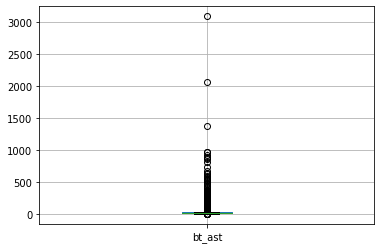

In [48]:
pd.DataFrame(screen['bt_ast']).boxplot()

In [49]:
screen =screen[screen['bt_ast']<1000]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,144808.000000,144808.000000,144808.000000,144808.000000,144808.000000,144808.000000,144808.000000,144808.000000,144808.000000,144808.000000,...,144808.000000,144808.000000,144808.000000,144808.000000,144808.000000,144808.000000,144808.00000,144808.000000,144808.000000,144808.000000
mean,88672.366513,1.539632,161.930177,61.667449,79.722731,0.933009,0.926693,1.028583,1.027533,120.250497,...,106.246941,59.182359,112.278389,14.074893,0.831255,24.464374,23.08166,30.437365,1.512748,0.506995
std,51209.233694,0.498429,9.219315,11.981072,9.461800,0.335212,0.329490,0.166631,0.163631,13.521655,...,50.358838,13.961224,31.333817,1.512091,0.189995,14.853479,20.21957,37.391056,0.770844,0.499953
min,1.000000,1.000000,85.000000,25.000000,54.800000,0.100000,0.100000,1.000000,1.000000,81.000000,...,4.000000,19.000000,24.000000,4.300000,0.300000,1.000000,1.00000,1.000000,1.000000,0.000000
25%,44292.750000,1.000000,155.000000,55.000000,73.000000,0.700000,0.700000,1.000000,1.000000,110.000000,...,68.000000,49.000000,90.000000,13.100000,0.700000,18.000000,14.00000,14.000000,1.000000,0.000000
50%,88695.500000,2.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,95.000000,58.000000,111.000000,14.000000,0.800000,22.000000,19.00000,20.000000,1.000000,1.000000
75%,133060.750000,2.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,135.000000,68.000000,133.000000,15.200000,1.000000,27.000000,26.00000,33.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,130.000000,106.500000,2.500000,1.900000,2.000000,2.000000,161.000000,...,259.000000,99.000000,200.000000,21.400000,1.400000,967.000000,2427.00000,999.000000,3.000000,1.000000


In [50]:
screen = screen[screen['bt_ast']<100]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,...,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000,144272.000000
mean,88679.594495,1.540236,161.923589,61.650771,79.708306,0.933063,0.926767,1.028599,1.027552,120.235652,...,106.201910,59.184131,112.296558,14.073106,0.831166,23.922965,22.580258,29.927505,1.511957,0.506543
std,51208.764470,0.498380,9.218052,11.972757,9.457259,0.335203,0.329454,0.166677,0.163686,13.518415,...,50.341682,13.957224,31.319997,1.511748,0.189962,9.317753,15.326616,34.003315,0.770410,0.499959
min,1.000000,1.000000,85.000000,25.000000,54.800000,0.100000,0.100000,1.000000,1.000000,81.000000,...,4.000000,19.000000,24.000000,4.300000,0.300000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,44303.750000,1.000000,155.000000,55.000000,73.000000,0.700000,0.700000,1.000000,1.000000,110.000000,...,68.000000,49.000000,90.000000,13.100000,0.700000,18.000000,14.000000,14.000000,1.000000,0.000000
50%,88700.500000,2.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,95.000000,58.000000,111.000000,14.000000,0.800000,22.000000,18.000000,20.000000,1.000000,1.000000
75%,133053.250000,2.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,135.000000,68.000000,133.000000,15.200000,1.000000,27.000000,26.000000,32.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,130.000000,106.500000,2.500000,1.900000,2.000000,2.000000,161.000000,...,259.000000,99.000000,200.000000,21.400000,1.400000,99.000000,522.000000,999.000000,3.000000,1.000000


In [51]:
countOutliers(screen, 'bt_ast')  # 포함시킨다. 

7175

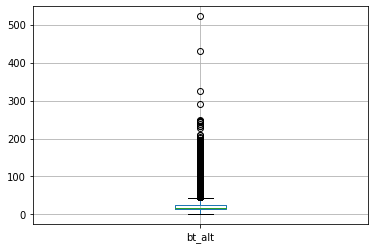

In [52]:
pd.DataFrame(screen['bt_alt']).boxplot()

In [53]:
screen = screen[screen['bt_alt']<100]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,143489.000000,143489.000000,143489.000000,143489.000000,143489.000000,143489.000000,143489.000000,143489.000000,143489.000000,143489.000000,...,143489.000000,143489.000000,143489.000000,143489.000000,143489.000000,143489.00000,143489.000000,143489.000000,143489.000000,143489.000000
mean,88677.571661,1.541867,161.894884,61.572525,79.655390,0.932688,0.926468,1.028671,1.027647,120.203298,...,105.999826,59.224373,112.234157,14.066613,0.830828,23.69790,22.004363,29.513238,1.510673,0.506011
std,51210.964092,0.498246,9.210766,11.910212,9.430357,0.335112,0.329469,0.166881,0.163959,13.519313,...,50.237373,13.955493,31.292501,1.509698,0.189934,8.74237,13.008107,32.704918,0.769773,0.499966
min,1.000000,1.000000,85.000000,25.000000,54.800000,0.100000,0.100000,1.000000,1.000000,81.000000,...,4.000000,19.000000,24.000000,4.300000,0.300000,1.00000,1.000000,1.000000,1.000000,0.000000
25%,44301.000000,1.000000,155.000000,55.000000,73.000000,0.700000,0.700000,1.000000,1.000000,110.000000,...,67.000000,49.000000,90.000000,13.100000,0.700000,18.00000,14.000000,14.000000,1.000000,0.000000
50%,88700.000000,2.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,94.000000,58.000000,111.000000,14.000000,0.800000,22.00000,18.000000,20.000000,1.000000,1.000000
75%,133042.000000,2.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,135.000000,68.000000,133.000000,15.200000,1.000000,27.00000,26.000000,32.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,130.000000,106.500000,2.500000,1.900000,2.000000,2.000000,161.000000,...,259.000000,99.000000,200.000000,21.400000,1.400000,99.00000,99.000000,999.000000,3.000000,1.000000


In [54]:
countOutliers(screen, 'bt_alt') # 약 9%지만, 중요변수이므로 포함시킨다.

8857

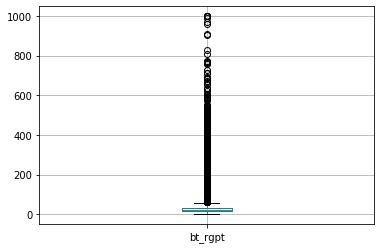

In [55]:
pd.DataFrame(screen['bt_rgpt']).boxplot()

In [56]:
screen = screen[screen['bt_rgpt']<180]
screen.describe()

,no,gender,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,bp_max,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
count,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,...,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000,142425.000000
mean,88671.748829,1.544890,161.868913,61.530560,79.612232,0.932758,0.926495,1.028555,1.027523,120.155036,...,105.663332,59.217701,112.266533,14.060074,0.830322,23.562900,21.832480,27.676040,1.505768,0.503633
std,51214.018896,0.497983,9.214000,11.900263,9.424723,0.335099,0.329496,0.166554,0.163603,13.517980,...,50.043629,13.952800,31.256841,1.507705,0.189938,8.507326,12.791927,22.440888,0.767032,0.499989
min,1.000000,1.000000,85.000000,25.000000,54.800000,0.100000,0.100000,1.000000,1.000000,81.000000,...,4.000000,19.000000,24.000000,4.300000,0.300000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,44285.000000,1.000000,155.000000,50.000000,73.000000,0.700000,0.700000,1.000000,1.000000,110.000000,...,67.000000,49.000000,90.000000,13.100000,0.700000,18.000000,14.000000,14.000000,1.000000,0.000000
50%,88695.000000,2.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,94.000000,58.000000,111.000000,14.000000,0.800000,22.000000,18.000000,20.000000,1.000000,1.000000
75%,133049.000000,2.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,134.000000,68.000000,133.000000,15.200000,1.000000,27.000000,26.000000,32.000000,2.000000,1.000000
max,177346.000000,2.000000,195.000000,130.000000,106.500000,2.500000,1.900000,2.000000,2.000000,161.000000,...,259.000000,99.000000,200.000000,21.400000,1.400000,99.000000,99.000000,179.000000,3.000000,1.000000


In [57]:
countOutliers(screen, 'bt_rgpt') #포함시킨다

10994

In [73]:
screen

,no,gender,age_group,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
0,1,2,55~59,155,55,67.5,0.9,1.0,1,1,...,97.0,52.0,88.0,13.4,0.6,21,24,30,1,1
1,2,1,35~39,170,70,84.8,1.2,1.0,1,1,...,139.0,46.0,136.0,17.1,0.9,25,30,33,2,1
2,3,1,35~39,170,70,86.0,1.0,1.0,1,1,...,82.0,50.0,123.0,14.7,0.7,43,46,88,1,1
3,4,2,40~44,155,50,77.0,1.5,1.5,1,1,...,55.0,47.0,117.0,13.4,0.6,17,8,10,1,0
4,5,2,40~44,165,55,66.0,1.0,1.0,1,1,...,65.0,64.0,104.0,10.3,0.7,39,43,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176661,177342,1,30~34,170,75,82.0,1.2,1.5,1,1,...,76.0,50.0,142.0,15.4,0.8,23,27,51,3,1
176662,177343,2,60~64,155,70,86.0,1.2,1.0,1,1,...,104.0,59.0,178.0,13.5,0.7,26,34,28,1,0
176663,177344,1,50~54,175,65,86.0,0.5,0.5,1,1,...,220.0,54.0,119.0,16.9,0.6,17,21,140,3,1
176664,177345,2,20~24,165,65,73.0,1.5,1.2,1,1,...,41.0,56.0,78.0,12.6,0.7,15,13,16,3,0


In [60]:
screen.to_excel("C:/Users/chhch/OneDrive/Documents/POSTECH/빅데이터프로젝트/screenh_h_screen_processing.xlsx", index=False, encoding='utf-8')

## 나이의 분포

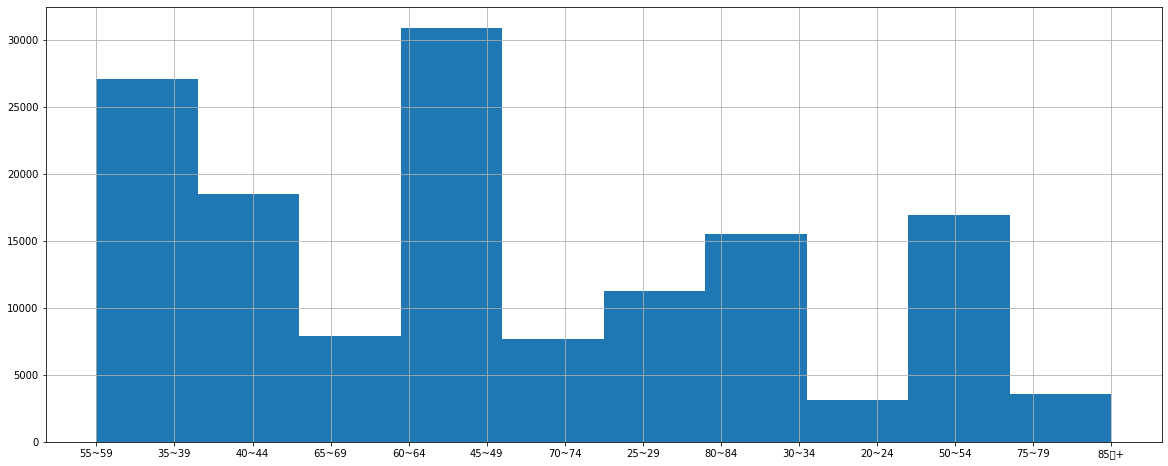

In [63]:
screen['age_group'].hist(figsize=(20,8))

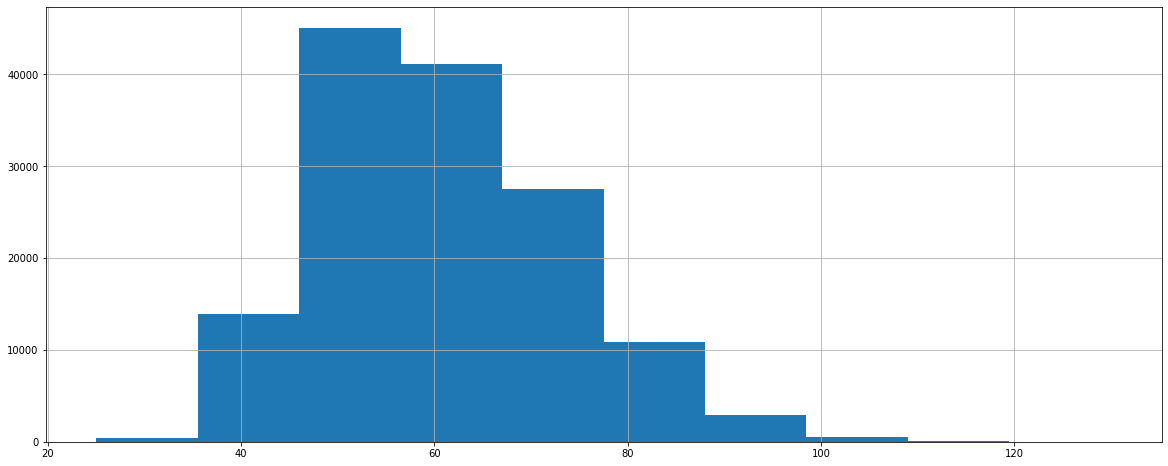

In [64]:
screen['weight_group'].hist(figsize=(20,8))

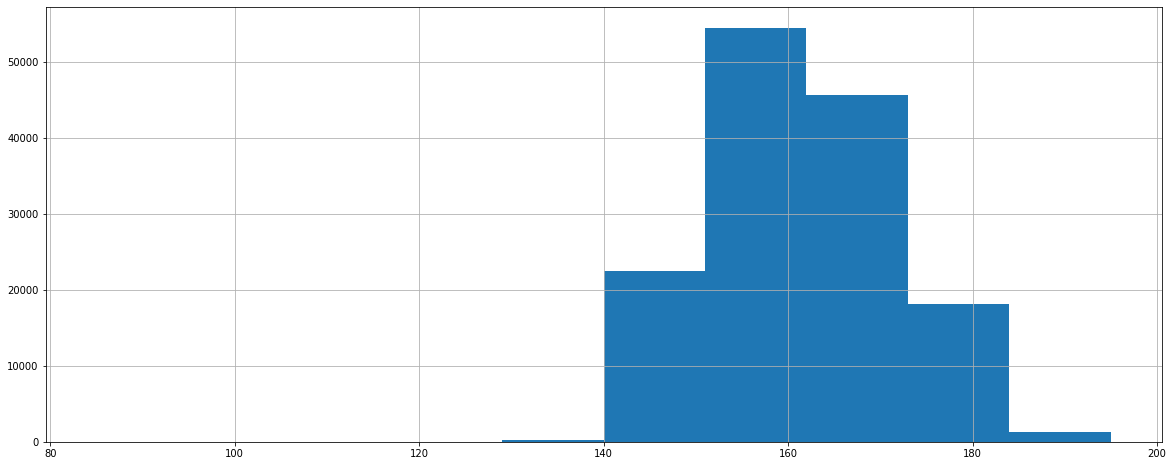

In [77]:
screen['height_group'].hist(figsize=(20,8))

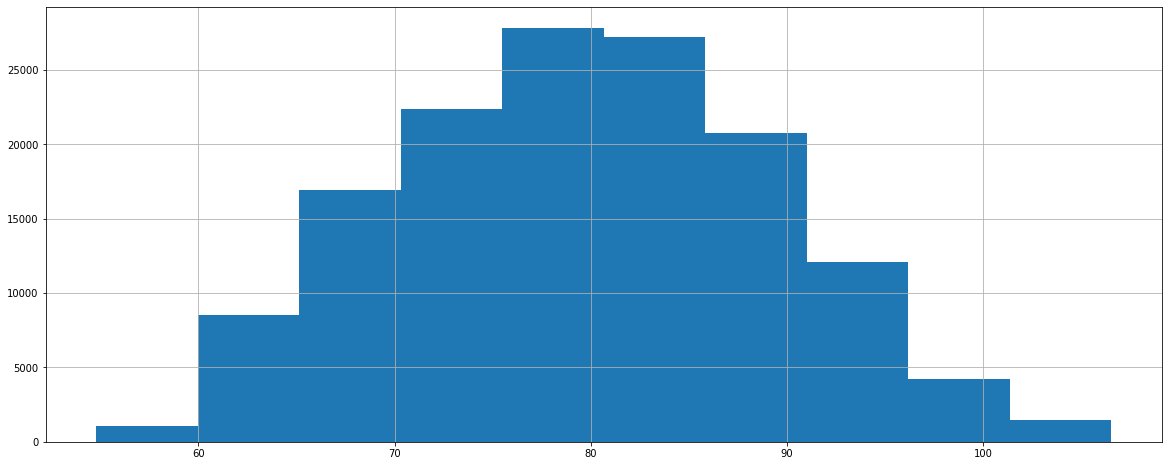

In [65]:
screen['waist'].hist(figsize=(20,8))

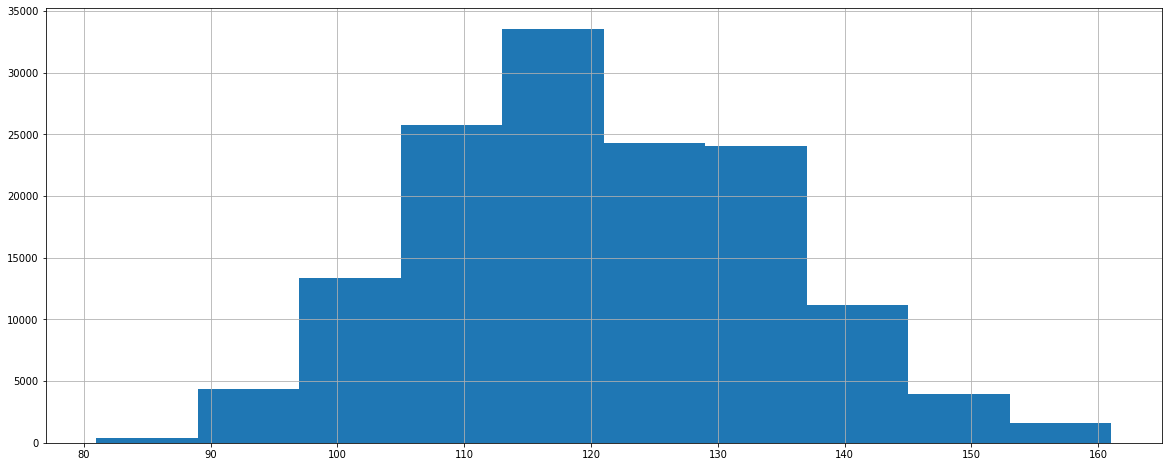

In [69]:
screen['bp_max'].hist(figsize=(20,8))

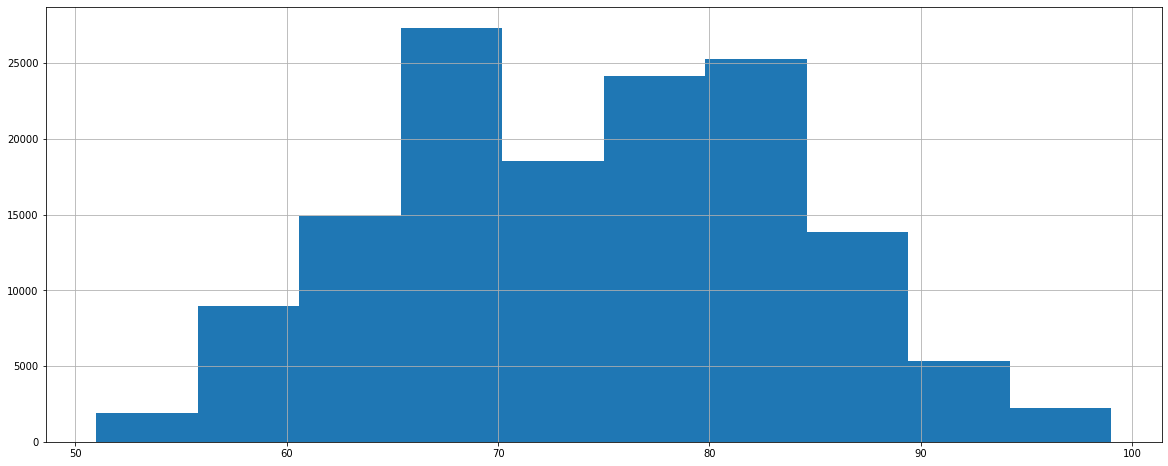

In [70]:
screen['bp_min'].hist(figsize=(20,8))

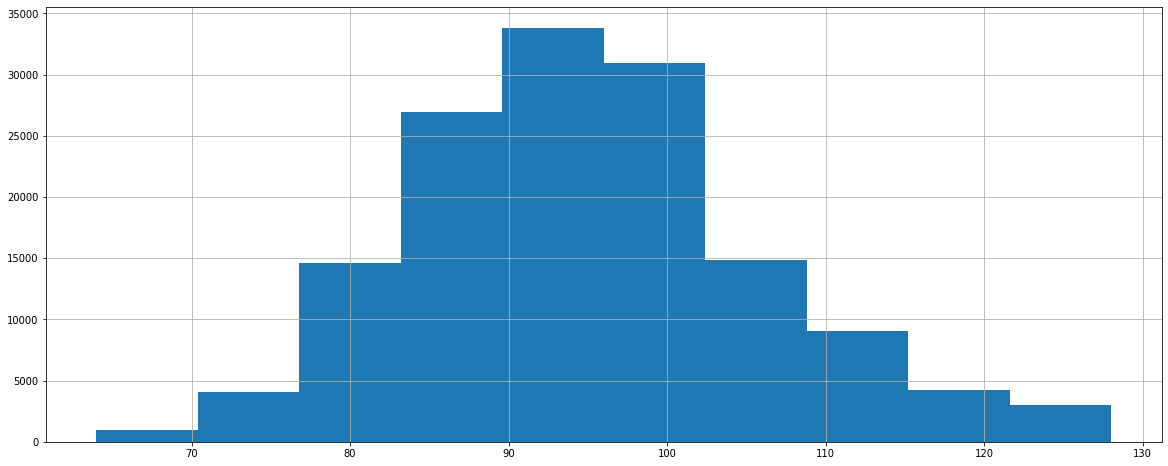

In [71]:
screen['bp_gluc'].hist(figsize=(20,8))

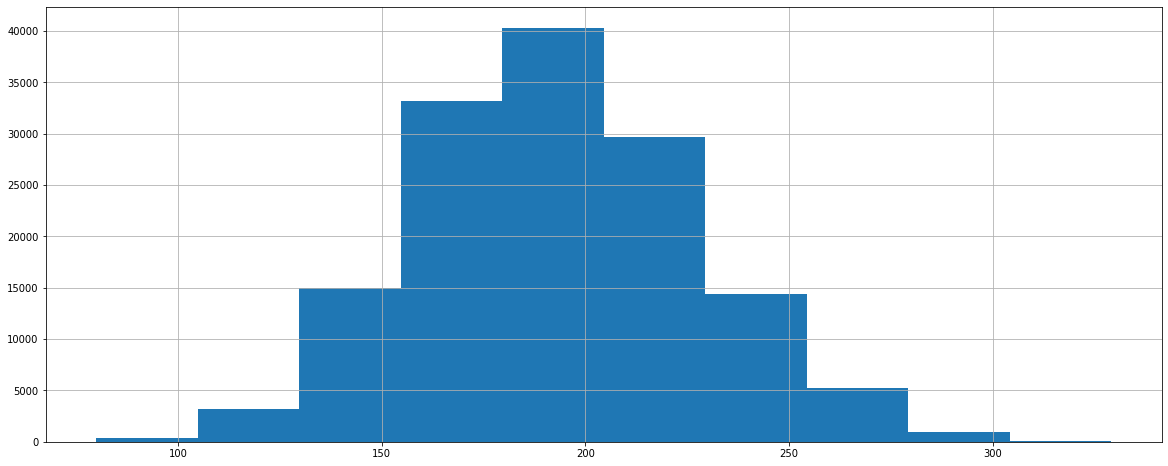

In [72]:
screen['bt_chol'].hist(figsize=(20,8))

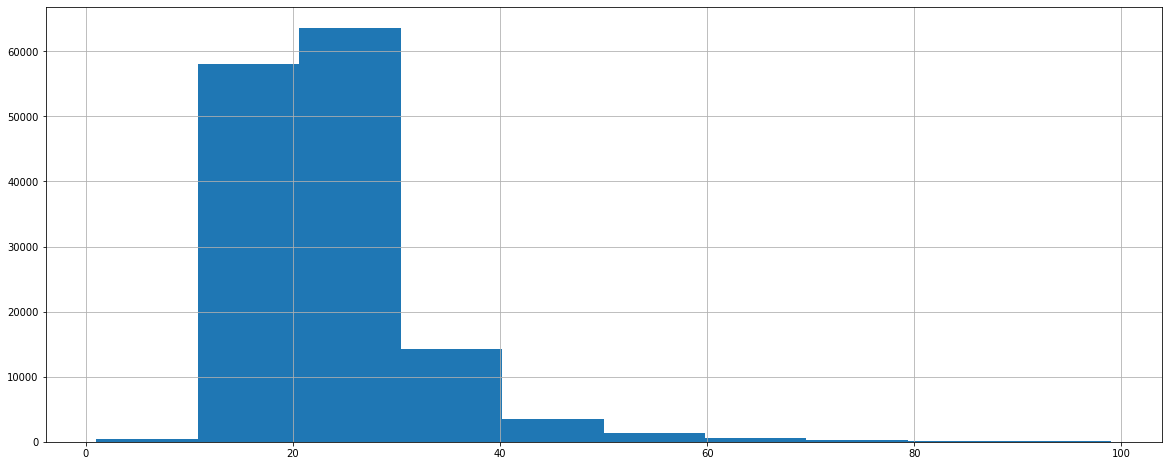

In [74]:
screen['bt_ast'].hist(figsize=(20,8))

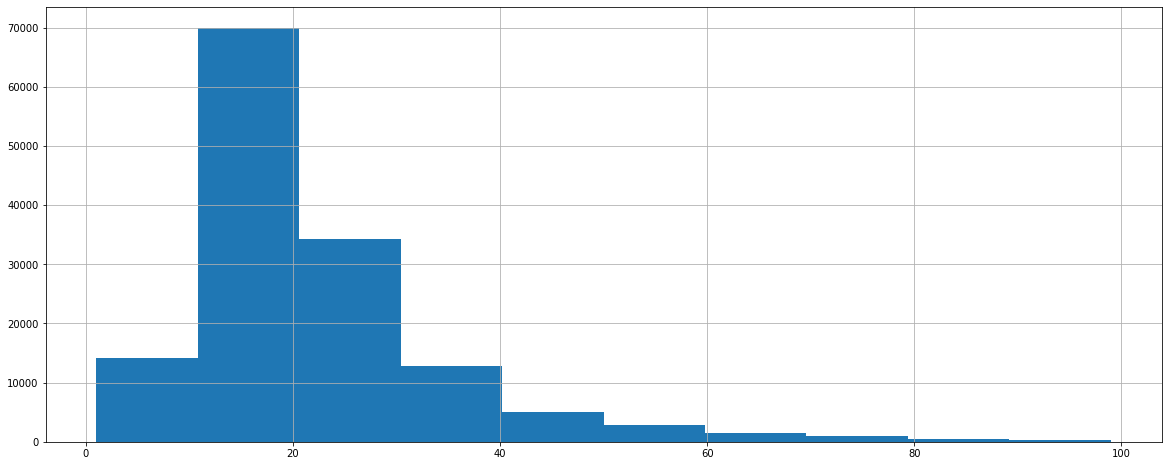

In [75]:
screen['bt_alt'].hist(figsize=(20,8))

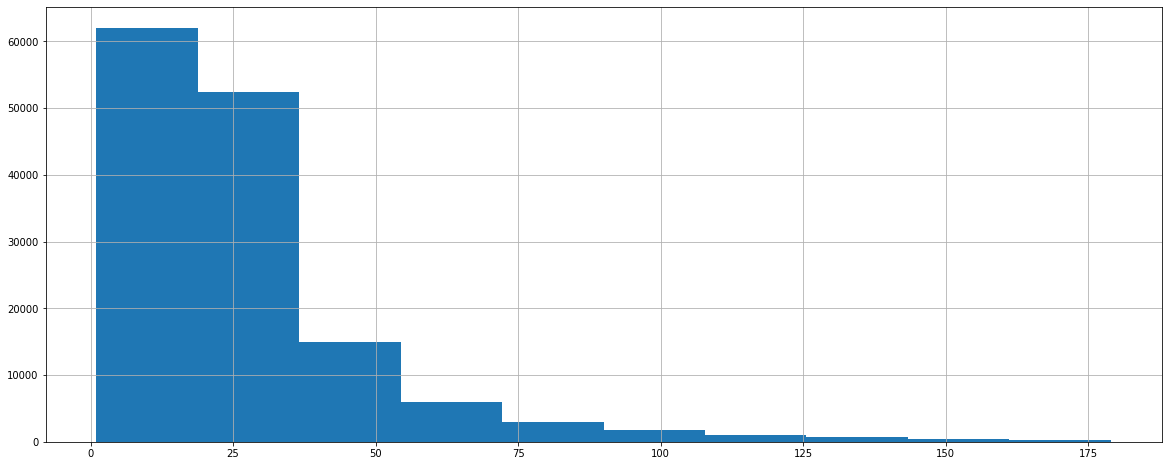

In [76]:
screen['bt_rgpt'].hist(figsize=(20,8))

# preview와 screen의 kde분석

In [79]:
screen

,no,gender,age_group,height_group,weight_group,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,...,bt_trig,bt_hdl,bt_ldl,bt_mch,bt_crea,bt_ast,bt_alt,bt_rgpt,smoke_flag,drinking_flag
0,1,2,55~59,155,55,67.5,0.9,1.0,1,1,...,97.0,52.0,88.0,13.4,0.6,21,24,30,1,1
1,2,1,35~39,170,70,84.8,1.2,1.0,1,1,...,139.0,46.0,136.0,17.1,0.9,25,30,33,2,1
2,3,1,35~39,170,70,86.0,1.0,1.0,1,1,...,82.0,50.0,123.0,14.7,0.7,43,46,88,1,1
3,4,2,40~44,155,50,77.0,1.5,1.5,1,1,...,55.0,47.0,117.0,13.4,0.6,17,8,10,1,0
4,5,2,40~44,165,55,66.0,1.0,1.0,1,1,...,65.0,64.0,104.0,10.3,0.7,39,43,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176661,177342,1,30~34,170,75,82.0,1.2,1.5,1,1,...,76.0,50.0,142.0,15.4,0.8,23,27,51,3,1
176662,177343,2,60~64,155,70,86.0,1.2,1.0,1,1,...,104.0,59.0,178.0,13.5,0.7,26,34,28,1,0
176663,177344,1,50~54,175,65,86.0,0.5,0.5,1,1,...,220.0,54.0,119.0,16.9,0.6,17,21,140,3,1
176664,177345,2,20~24,165,65,73.0,1.5,1.2,1,1,...,41.0,56.0,78.0,12.6,0.7,15,13,16,3,0


In [78]:
insu_p = pd.DataFrame(pd.read_excel('C:/Users/chhch/OneDrive/Documents/POSTECH/빅데이터프로젝트/insu_pre_review_processing.xlsx', sheet_name= 'Sheet1'))
insu_p

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi
0,C112346,혈액검사,재검,2014-10-09,1,70,165,60,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.140496
1,C112350,일반검진,재검,2014-11-18,1,65,175,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.671254
2,C112355,일반검진,재검,2015-03-18,1,70,165,65,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.158818
3,C112356,혈액검사,재검,2015-09-28,1,70,165,60,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.507805
4,C112358,혈액검사,거절,2015-02-24,1,70,165,70,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.491508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929,C134246,혈액검사,승인,2015-02-11,2,60,150,50,94.0,80.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.555556
14930,C134250,일반검진,승인,2015-09-16,2,50,160,60,90.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.308150
14931,C134251,일반검진,재검,2015-06-21,2,55,155,45,89.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.473407
14932,C134252,혈액검사,재검,2015-06-26,2,65,150,45,86.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.888889


In [ ]:
sns.kdeplot(dataset1, shade=True)
sns.kdeplot(dataset2, shade=True)
plt.legend()
plt.show()

### 혈액검사 항목 간 상관관계 확인

In [ ]:
bt_columns = pre_review[['bt_chol','bt_crea','bt_gluc','bt_hb','bt_hbsa','bt_hct','bt_mch','bt_mchc',\
              'bt_mvc','bt_plat','bt_rbc','bt_wbc','bt_rgpt','bt_sgot','bt_sgpt','bt_trig']]

In [ ]:
bt_columns.corr()

In [ ]:
sns.pairplot(bt_columns)